In [7]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [8]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
iris.target.head(3)
# 0 = setosa, 1 = versicolor, 2 = virginica

0    0
1    0
2    0
Name: target, dtype: int64

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# Logistic Regression
# This is a classification algorithm that is used to predict the probability of a categorical dependent variable.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

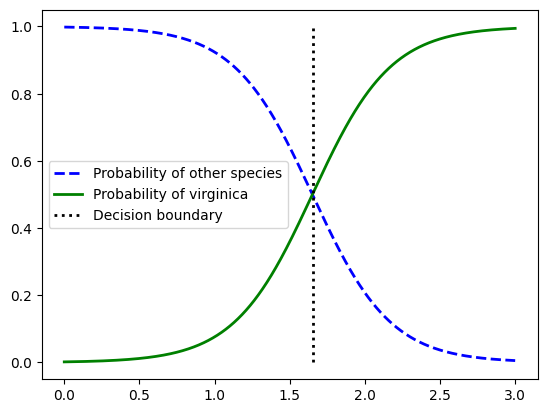

In [13]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 1000 evenly spaced numbers between 0 and 3
y_proba = log_reg.predict_proba(X_new)
# y_proba[:, 1] is the probability of the sample being a virginica
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
# decision_boundary is the first value of X_new where the probability of being a virginica is >= 0.5

# Plot the decision boundary
import matplotlib.pyplot as plt

plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label="Probability of other species")
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label="Probability of virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label="Decision boundary")
plt.legend()
plt.show()
# The decision boundary is at 1.66 cm
# The width is between 1.4 and 2.5 cm

In [14]:
decision_boundary

array([1.65165165])

In [15]:
log_reg.predict([[1.7], [1.5]])
# The model predicts that a flower with a petal width of 1.7 cm is a virginica

array([ True, False])

In [16]:
# Softmax Regression
# The softmax regression model predicts the probability of each class
# This works with multiple classes

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# C makes it so that the model is less likely to overfit
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [18]:
softmax_reg.predict([[5, 2]])
# The model predicts that a flower with a petal length of 5 cm and a petal width of 2 cm is a virginica [2]

array([2])

In [19]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])